In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler

train_filepath=r"C:\Users\Owner\Downloads\titanic\train.csv" #FILE LOACTION ON MY COMPUTER


In [3]:
#EXPLORATORY DATA ANALYSIS
data= pd.read_csv(train_filepath)
print(data.head())
print(data.info())
print(data.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [4]:
#let us get the basic information using vizualization

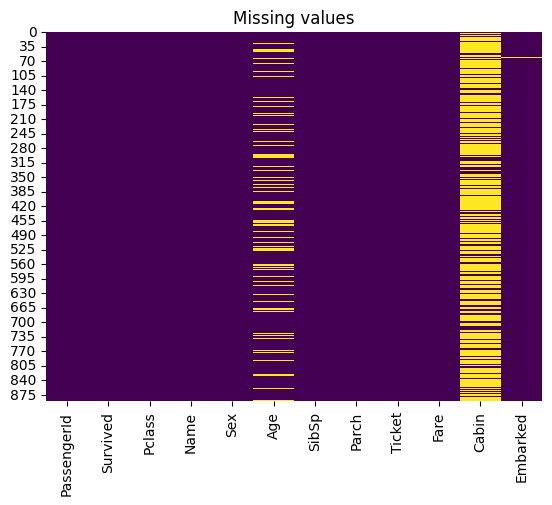

In [5]:
#visualizing missing values using heatmap
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values')
plt.show()

In [6]:
#The heatmap above shows that we have some missing values on the AGE colum, Cabin, and embarked.


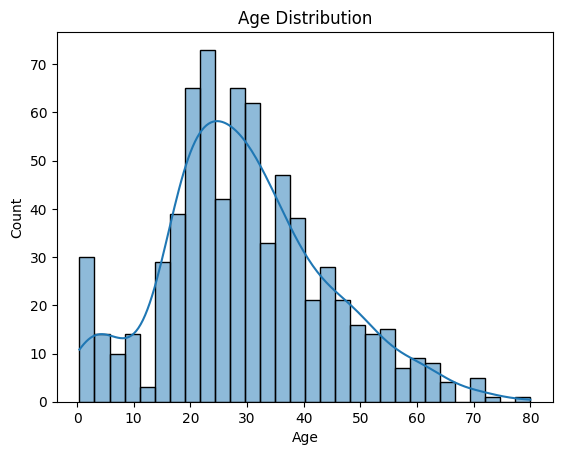

In [7]:
#now we visuslaise the distribution of some important features to get an easy undertanding. 
sns.histplot(data['Age'], bins=30, kde=True)
plt.title ('Age Distribution')
plt.show()

In [8]:
#The Histogram shows that we have a lot of young adults between the age of 20 years old to 40 years old
#this could also play a vital role in their survival. 


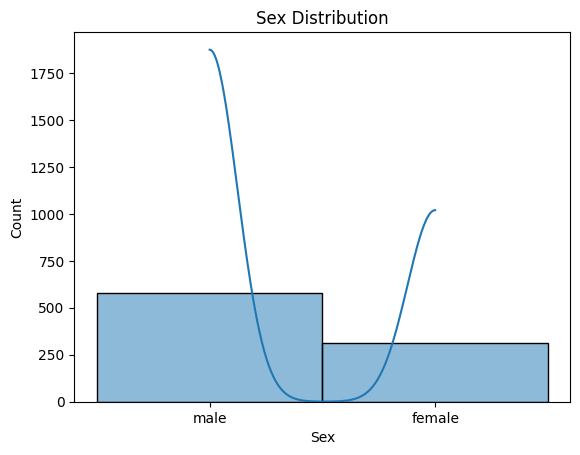

In [9]:
#Sex distribution 
sns.histplot(data['Sex'], bins=30, kde=True)
plt.title("Sex Distribution")
plt.show()


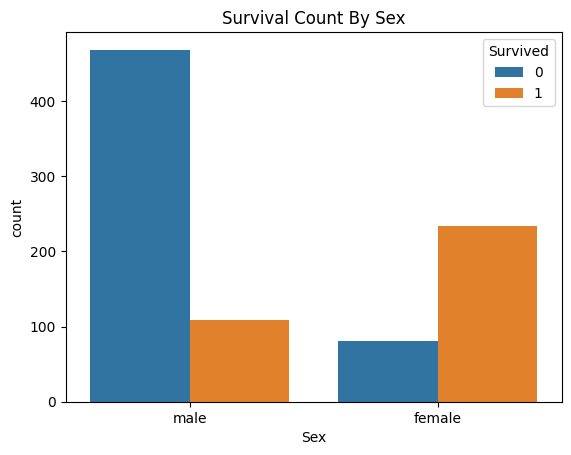

In [10]:
#We have more men than women, now will count the survival rate based on sex. 
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count By Sex')
plt.show()

In [11]:
#From this plot we can see that more women survived. 

DATA CLEANING AND PREPROCESSING

In [12]:
#Step 1- handle missing values 
print(data.isnull().sum()) #check for missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
#fill in missing age values with the median 
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)

#fill in the embark values with the mode
mode_embarked = data['Embarked'].mode()[0]
data['Embarked'] = data['Embarked'].fillna(mode_embarked)

#we will drop the Cabin column due to high numbe rof missing value 
data.drop('Cabin', axis = 1, inplace=True)

In [14]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [15]:
#STEP 2 - ENCODING CATEGORICAL VALUES Age AND Embark
print(data.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [16]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data=pd.get_dummies(data, columns=['Embarked'], drop_first=True)

In [17]:
#STEP 3 FEATURE NORMALIZATION 
#FIRST; we will identify the numerical values 
numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [18]:
#STEP 4 ; FEATURE SELECTION
#In this step we try to select features that contribute the modest to our model and rop the ones that are noe needed
#e.g Name, Ticket, Passneegr ID
data.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

In [19]:
#STEP 5 ; FINAL DATA INSPECTION 
print(data.head())
print(data.info())

   Survived  Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  \
0         0       3    1 -0.565736  0.432793 -0.473674 -0.502445       False   
1         1       1    0  0.663861  0.432793 -0.473674  0.786845       False   
2         1       3    0 -0.258337 -0.474545 -0.473674 -0.488854       False   
3         1       1    0  0.433312  0.432793 -0.473674  0.420730       False   
4         0       3    1  0.433312 -0.474545 -0.473674 -0.486337       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    float64
 5   Parch       891 non-null   

In [28]:
#I will now set X to be our Features and Y to be our target 
X = data.drop('Survived', axis=1)
y = data['Survived']

print (X.head())
print (y.head())


   Pclass  Sex       Age     SibSp     Parch      Fare  Embarked_Q  Embarked_S
0       3    1 -0.565736  0.432793 -0.473674 -0.502445       False        True
1       1    0  0.663861  0.432793 -0.473674  0.786845       False       False
2       3    0 -0.258337 -0.474545 -0.473674 -0.488854       False        True
3       1    0  0.433312  0.432793 -0.473674  0.420730       False        True
4       3    1  0.433312 -0.474545 -0.473674 -0.486337       False        True
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [24]:
#I AM TRAINING THE MODEL WITH RANDOM FOREST AND SVM DIFFERENT CLASSIFIERS, THEN I WILL PERFOEM A CROSS VALIDATION
#ON A MODEL WITH HIGHEST ACCURACY TO IMPROVE THE PERFORMANCE OF THE MODEL AND ELIMINATE OVERFITTING 

In [29]:
#splitting dataset into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, random_state=2)

In [33]:
#Modelling with RANDOM FOREST AND SVM
#importing all Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score



In [34]:
#modelling with Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


rf_accuracy = f1_score(y_test, y_pred)
print (f"The f1 Score is {rf_accuracy*100:.2f}%")

The f1 Score is 76.00%


In [36]:
#modelling with SVM 
sv = SVC(kernel='rbf')
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)


#evaluating the model with f1 score 
sv_accuracy = f1_score(y_test, y_pred)
print (f"The f1 Score is {sv_accuracy*100:.2f}%")


The f1 Score is 73.85%


In [39]:
#Now I will use cross validation on both models to reduce overfitting and improve model performance 
#and also see the model that generalizes better between the two 

from sklearn.model_selection  import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score

In [44]:
#cross validating Randomforest
rf = RandomForestClassifier(n_estimators=100)
rf_scores = cross_val_score (rf, X, y, cv=5)

print("cross_val_score:", rf_scores )

mean_accuracy = rf_scores.mean()
print(f'The Mean Accuracy is :{mean_accuracy*100:.2f}%')

cross_val_score: [0.7877095  0.80337079 0.84831461 0.78089888 0.83146067]
The Mean Accuracy is :81.04%


In [46]:
#cross validating with SVM 
sv = SVC(kernel='rbf')
sv_scores = cross_val_score (sv, X, y, cv=5)

print("cross_val_score:", sv_scores )

mean_accuracy = sv_scores.mean()
print(f'The Mean Accuracy is :{mean_accuracy*100:.2f}%')


cross_val_score: [0.82122905 0.8258427  0.80337079 0.81460674 0.84269663]
The Mean Accuracy is :82.15%


OBSERVATION:
Initially, Random Forest slightly outperformed SVM with F1 Score of 76% to 73.855 though both models had close performance.After cross validation both models improved significantly, but SVM now slightly outperforms Random Forest F1 Score of 82.15% to 81.04%.

CONCLUSION: Cross-validation shows that both models perform well, with SVM having a slight edge in generalization. This suggests that SVM may generalize better on unseen data, though both models are close in performance.